In [6]:
%matplotlib widget

In [7]:
from week4_functions import *

savefigs = True

doExp1 = True

In [8]:
def lin_func(a, b):
    def f(x):
        return a*x + b
    return f

def sin_func(A, omega, phi):
    def f(x):
        return A*np.sin(omega*x + phi)
    return f

In [9]:
width = 1.0
height = 1.0
I = J = 150

A = 1/2
ω = 2*np.pi/height
φ = 0

left_boundary_function = lin_func(0,0)
right_boundary_function = sin_func(A, ω, φ)

Is: [ 11  16  21  26  31  36  42  47  52  57  62  67  72  78  83  88  93  98
 103 108 114 119 124 129 134 139 144]
V_true.shape: (22801, 2), y_true.shape: (22801,), V.shape: (144, 2)
V_true.shape: (22801, 2), y_true.shape: (22801,), V.shape: (289, 2)
V_true.shape: (22801, 2), y_true.shape: (22801,), V.shape: (484, 2)
V_true.shape: (22801, 2), y_true.shape: (22801,), V.shape: (729, 2)
V_true.shape: (22801, 2), y_true.shape: (22801,), V.shape: (1024, 2)
V_true.shape: (22801, 2), y_true.shape: (22801,), V.shape: (1369, 2)
V_true.shape: (22801, 2), y_true.shape: (22801,), V.shape: (1849, 2)
V_true.shape: (22801, 2), y_true.shape: (22801,), V.shape: (2304, 2)
V_true.shape: (22801, 2), y_true.shape: (22801,), V.shape: (2809, 2)
V_true.shape: (22801, 2), y_true.shape: (22801,), V.shape: (3364, 2)
V_true.shape: (22801, 2), y_true.shape: (22801,), V.shape: (3969, 2)
V_true.shape: (22801, 2), y_true.shape: (22801,), V.shape: (4624, 2)
V_true.shape: (22801, 2), y_true.shape: (22801,), V.shape: (5

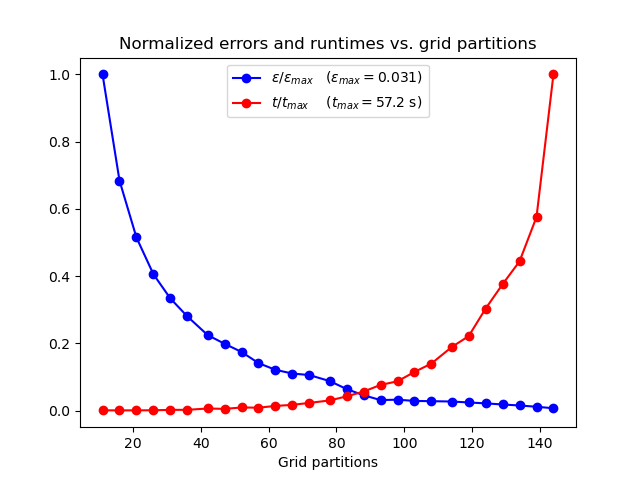

In [10]:
if doExp1:
    from scipy.interpolate import griddata
    import time
    y_true, V_true, T_true = solve_heat_eq(width, height, I, J, left_boundary_function, right_boundary_function, return_plots=False, verbose=False)
    
    errors = []
    run_times = []
    N_tests = 30

    # List of values op to our true I that are not divisors of I
    Is = np.array([i for i in np.linspace(1,I,N_tests).astype(int) if I%i != 0])
    print(f"Is: {Is}")
    for I in Is:
        J = I
        
        start_time = time.time()
        y, V, T = solve_heat_eq(width, height, I, J, left_boundary_function, right_boundary_function, return_plots=False, verbose=False)
        end_time = time.time()
        
        y_interp = griddata(V_true, y_true, V, method='linear')
        errors.append(np.linalg.norm(y - y_interp, np.inf))
        run_times.append(end_time - start_time)
        print(f"Error for I = {I}: {errors[-1]:.2e}", end='\r')
        
    errors_max = np.max(errors)
    errors_norm = np.array(errors)/errors_max
    run_times_max = np.max(run_times)
    run_times_norm = np.array(run_times)/run_times_max

    fig = plt.figure()
    plt.plot(Is, errors_norm, 'o-', color='blue', label = f'$ε/ε_{{max}}$   $(ε_{{max}} = {errors_max:.3f})$')
    plt.plot(Is, run_times_norm, 'o-', color='red', label = f'$t/t_{{max}}$    $(t_{{max}} = {run_times_max:.1f}\ \mathrm{{s}})$')

    plt.title("Normalized errors and runtimes vs. grid partitions")
    plt.xlabel("Grid partitions")
    # plt.xticks(Is)
    plt.legend()
    plt.show()
    plt.tight_layout()
    
    if savefigs:
        fig.savefig("Images/normalized_errors_runtimes_vs_grid_partitions.png", dpi=300)